<a href="https://colab.research.google.com/github/Fsrkh/ml-course-jadi-exercises/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Downloading data

In [6]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2024-01-02 17:43:32--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.004s  

2024-01-02 17:43:33 (19.1 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



# Understanding Data

In [7]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


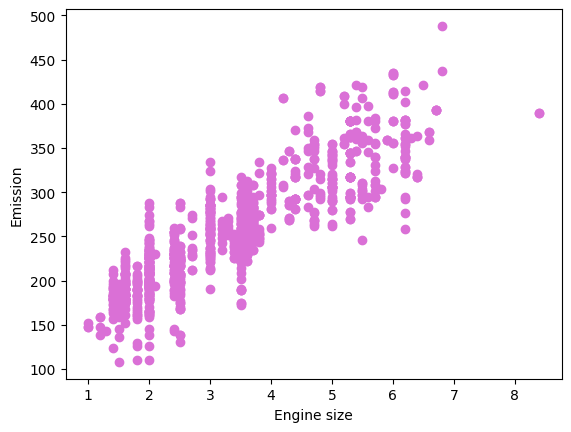

In [10]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='orchid')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# Train and test split

In [11]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(cdf, test_size=0.2, random_state=42)

# Adding polynomial features

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  1.4 ,  1.96],
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  3.  ,  9.  ],
       ...,
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  1.8 ,  3.24],
       [ 1.  ,  5.6 , 31.36]])

In [16]:
pregr = linear_model.LinearRegression()

y_hat = pregr.fit(train_x, train_y)

print ('Coefficients: ', pregr.coef_)
print ('Intercept: ',pregr.intercept_)

Coefficients:  [[38.99297872]]
Intercept:  [126.28970217]


# Evaluation

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred = pregr.predict(test_x)

r2 = r2_score(test_y, y_pred)
print(f'R-squared (R2) Score: {r2:.2f}')

mae = mean_absolute_error(test_y, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')


mse = mean_squared_error(test_y, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


R-squared (R2) Score: 0.76
Mean Absolute Error (MAE): 24.10
Mean Squared Error (MSE): 985.94
Root Mean Squared Error (RMSE): 31.40
